In [1]:
import math
import collections
import urllib

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [2]:
import getweather

In [3]:
def fillnans(array):
    x = np.arange(len(array))
    good = ~np.isnan(array)
    
    return np.interp(x, x[good], array[good])

In [4]:
hilo = getweather.getyear('HILO',['TMIN','TMAX'],2000)
#Tuple unpacking

Using ('USW00021504', 19.7192, -155.0531, 11.6, 'HI', 'HILO INTL AP', 'GSN', '', '91285').


In [5]:
hilo['TMIN'], hilo['TMAX'] = fillnans(hilo['TMIN']), fillnans(hilo['TMAX'])

In [6]:
np.mean(hilo['TMIN']), np.min(hilo['TMIN']),np.max(hilo['TMIN'])

(19.102739726027398, 14.4, 23.3)

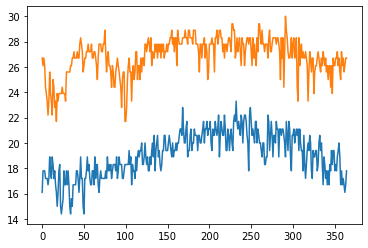

In [8]:
pp.plot(hilo['TMIN'])
pp.plot(hilo['TMAX'])
pp.show()

In [13]:
mean, err = np.mean(hilo['TMIN']), math.sqrt(np.var(hilo['TMIN']))


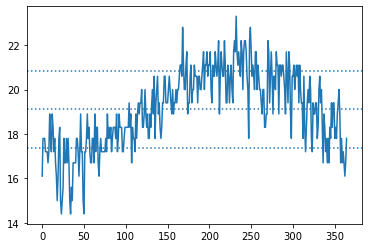

In [16]:
pp.plot(hilo['TMIN'])

for value in [mean, mean-err, mean+err]:
    pp.axhline(value, linestyle = ':')
    
pp.show()

#### Getting rain information for Hilo using precipitate values

In [17]:
rain = getweather.getyear('HILO',['PRCP'],2000)['PRCP']
rain

array([0.000e+00, 8.000e+00, 3.000e+01, 1.300e+01, 6.600e+01, 8.600e+01,
       2.310e+02, 9.100e+01, 9.100e+01, 1.350e+02, 4.100e+01, 6.350e+02,
       1.214e+03, 4.300e+01, 2.570e+02, 5.660e+02, 2.720e+02, 2.010e+02,
       8.600e+01, 6.900e+01, 1.170e+02, 1.420e+02, 3.000e+00, 0.000e+00,
       0.000e+00, 3.000e+01, 3.600e+01, 1.500e+01, 3.300e+01, 5.000e+00,
       2.300e+01, 5.000e+00, 5.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.300e+01, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 1.000e+01, 1.000e+01, 1.500e+01,
       0.000e+00, 2.800e+01, 1.000e+01, 0.000e+00, 0.000e+00, 2.300e+01,
       5.100e+01, 2.800e+01, 6.900e+01, 5.800e+01, 5.000e+00, 1.800e+01,
       5.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.300e+01, 1.500e+02,
       1.500e+01, 2.000e+01, 5.000e+00, 6.400e+01, 

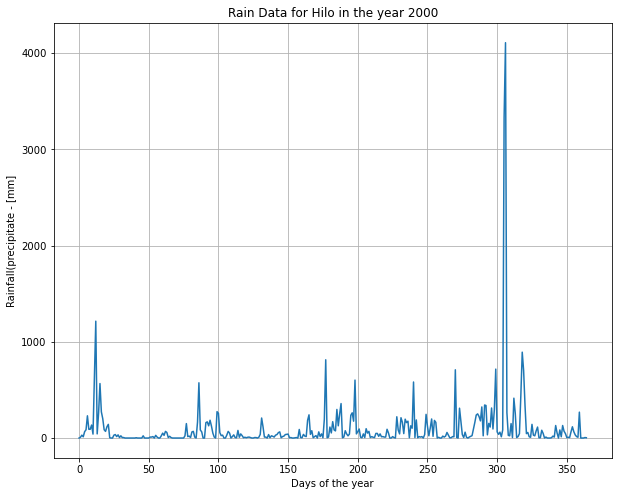

In [23]:
pp.figure(figsize=(10,8))
pp.plot(rain)
pp.xlabel('Days of the year')
pp.ylabel('Rainfall(precipitate - [mm]')
pp.title('Rain Data for Hilo in the year 2000')
pp.grid()
pp.show()

### smooth the data to remove the data - using moving average and correlate


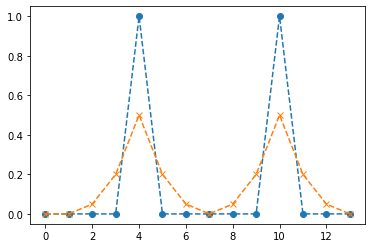

In [27]:
x = np.array([0,0,0,0,1,0,0,0,0,0,1,0,0,0])  #then plot

#add in second stage
mask = np.array([0.05,0.2,0.5,0.2,0.05])
y = np.correlate(x, mask,'same')   #requests the output of the correlation to be the same as the input

#plot in the first stage
pp.plot(x,'--o')

#add in the second stage
pp.plot(y,'--x')

pp.show()

In [28]:
#normalization for smoothing
np.ones(10)/10

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

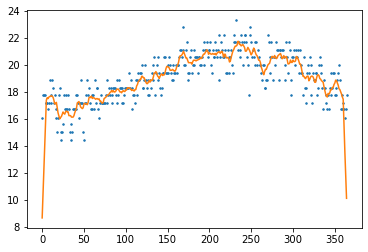

In [32]:
#testing the normalization
pp.plot(hilo['TMIN'],'.',ms=3)
pp.plot(np.correlate(hilo['TMIN'], np.ones(10)/10, 'same'))  # same vs valid
pp.show()

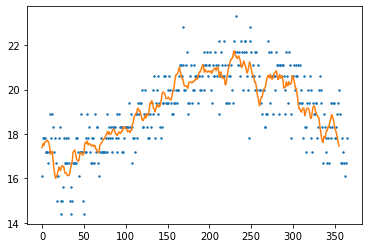

In [31]:
#testing the normalization
pp.plot(hilo['TMIN'],'.',ms=3)
pp.plot(np.correlate(hilo['TMIN'], np.ones(10)/10, 'valid'))  # same vs valid
pp.show()

In [35]:
def smooth(array, window = 10, mode = 'valid'):
    return np.correlate(array, np.ones(window)/window, mode)

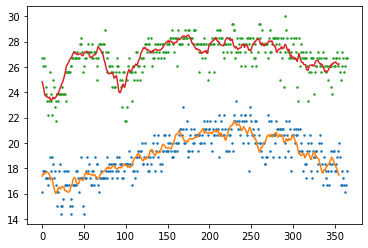

In [37]:
pp.plot(hilo['TMIN'],'.',ms = 3)
pp.plot(smooth(hilo['TMIN'], 10))

pp.plot(hilo['TMAX'],'.',ms = 3)
pp.plot(smooth(hilo['TMAX'], 10))

pp.show()

In [38]:
def plotsmooth(station,year):
    stationdata = getweather.getyear(station,['TMIN','TMAX'],year)
    
    for obs in ['TMIN','TMAX']:
        stationdata[obs] = fillnans(stationdata[obs])
        
        #thinner points
        pp.plot(stationdata[obs],'.', ms = 2)
        pp.plot(range(10,356), smooth(stationdata[obs], 20))
    
    pp.title(station)
    pp.axis(xmin = 1, xmax = 365, ymin = -10, ymax = 45)
    

(1.0, 365.0, 13.0, 30.0)

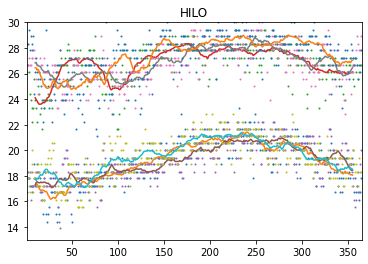

In [44]:
plotsmooth('HILO', 2000)
plotsmooth('HILO', 2001)
plotsmooth('HILO', 2002)

#having seen the output of the y range, the y axis is adjusted
pp.axis(ymin = 13, ymax = 30)

Using ('USW00094728', 40.7789, -73.9692, 39.6, 'NY', 'NEW YORK CNTRL PK TWR', '', 'HCN', '72506').
Using ('USW00023188', 32.7336, -117.1831, 4.6, 'CA', 'SAN DIEGO LINDBERGH FLD', 'GSN', '', '72290').
Using ('USW00014922', 44.8831, -93.2289, 265.8, 'MN', 'MINNEAPOLIS/ST PAUL AP', 'GSN', 'HCN', '72658').


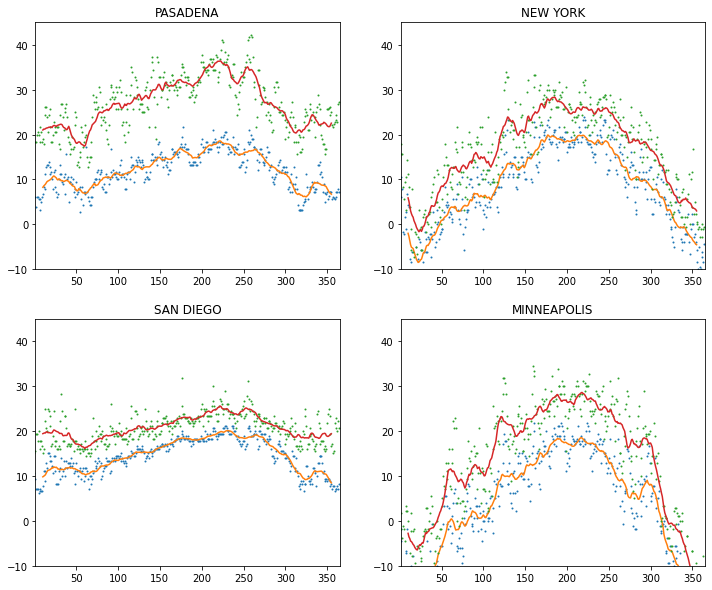

In [45]:
#comparing cities in different climates
pp.figure(figsize = (12,10))

for i, city in enumerate(['PASADENA','NEW YORK','SAN DIEGO','MINNEAPOLIS']):
    pp.subplot(2,2,i+1)
    plotsmooth(city,2000)

### Python Data Science Handbook by Jake Vanderplas

## EOD